In [2]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats


In [2]:
#1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
μ= 2
stats.poisson(μ)

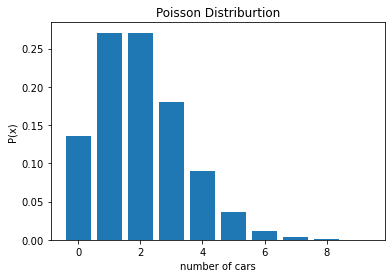

In [3]:
x = np.arange(0,10)
y = stats.poisson(μ).pmf(x)
plt.bar(x,y)
plt.xlabel("number of cars")
plt.ylabel( "P(x)")
plt.title('Poisson Distriburtion')
plt.show()

In [25]:
# establish variables 
n_sim = 100_000
µ = 2
dist = stats.poisson(µ)
#use rvs tp generate simulations and save it
dist = dist.rvs(n_sim)

In [31]:
# What is the probability that no cars drive up in the noon hour?
 # thoeritical
print(stats.poisson(mean).pmf(0))

 # experomental
print((dist == 0).mean()) 

0.1353352832366127
0.13573


In [20]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(mean).sf(2) #theoritical

0.32332358381693654

In [32]:
(dist >= 3).mean() # experimental

0.32345

In [33]:
#How likely is it that the drive through gets at least 1 car?
stats.poisson(mean).sf(0) # theoritical

0.8646647167633873

In [35]:
(dist > 0).mean() # experimental

0.86427

In [ ]:
#Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:2. 

In [9]:
μ = 3
σ = 0.3
dist = stats.norm(μ,σ)

#lets makes simulation
n_sim = 10_000
dist_sim = dist.rvs(n_sim)
dist_sim

array([2.92801813, 3.17725614, 2.98337124, ..., 3.11141183, 3.24618262,
       2.82642443])

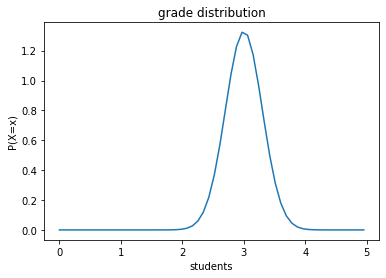

In [10]:
x = np.arange(0,5,.09)
y = dist.pdf(x)
plt.plot(x,y)
plt.xlabel('students')
plt.ylabel('P(X=x)')
plt.title("grade distribution")
plt.show()

In [11]:
# What grade point average is required to be in the top 5% of the graduating class?
dist.isf(0.04)  


3.5252058213756507

In [12]:
# What GPA constitutes the bottom 15% of the class?
dist.ppf(.15) 

2.689069983151863

In [15]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship

#3rd decile 20%-30%
dist.ppf([.2,.3])

array([2.74751363, 2.84267985])

In [14]:
#2.8 gpa will qualify

In [59]:
# If I have a GPA of 3.5, what percentile am I in?
dist.cdf(3.5)

0.9522096477271853

In [30]:
#3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

p = 0.02
trial = 4326
clicks = stats.binom(trial,p)
likely_click = clicks.sf(96)
likely_click


0.13975823631416445

In [7]:
#4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
p = 1/100
trial = 60
success = stats.binom(trial,p)
success.sf(0)

0.45284335760923855

In [16]:
#5 The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

## How likely is it that the break area gets cleaned up each day?

trial = .9 * 3 * 22
p = 0.03
stats.binom(trial,p).sf(0)

0.8362274861228872

Text(0.5, 0, 'Number of time area is cleaned per day')

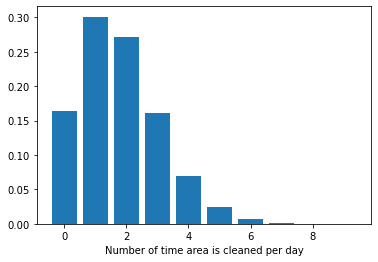

In [18]:
x = np.arange(0,10)
y= stats.binom(trial,p).pmf(x)

plt.bar(x,y)
plt.xlabel("Number of time area is cleaned per day")

In [19]:
# How likely is it that it goes two days without getting cleaned up?
stats.binom(trial * 2, p).pmf(0)

0.026821436301628983

In [20]:
#  All week?
stats.binom(trial * 5, p).pmf(0)

0.00011781621791055051

In [10]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.
# comvert mean and standrad dev to mins
μ = 15 * 2
σ = 3 * 2
# we have max 60 mins minus 2 mins minus 15 mins to not be late for class
n = 60-2-15-10


stats.norm(μ,σ).cdf(n)

0.6914624612740131

In [ ]:
#7 . Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

#What percent of employees earn less than 60,000?
#What percent of employees earn more than 95,000?
#What percent of employees earn between 65,000 and 80,000?
#What do the top 5% of employees make?

In [19]:
import env
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
salaries = pd.read_sql('SELECT * FROM salaries WHERE salaries.to_date > NOW()', url)

In [20]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [23]:
# average salary and standard deviation
avg_salary = salaries.salary.mean()
avg_salary

72012.23585730705

In [24]:
std_salary = salaries.salary.std()
std_salary

17309.99538025198

In [25]:
#a. What percent of employees earn less than 60,000?
stats.norm(avg_salary, std_salary).cdf(59_999)

0.2438393099761686

In [26]:
#b. What percent of employees earn more than 95,000?
stats.norm(avg_salary,std_salary).sf(94999)

0.09209773465617083

In [28]:
#c. What percent of employees earn between 65,000 and 80,000?
np.diff(stats.norm(avg_salary,std_salary).cdf([65_000, 80_000]))

array([0.33506057])

In [29]:
#d. What do the top 5% of employees make?
stats.norm(avg_salary,std_salary).isf(.05)

100484.64454102777